# Group Project - KSI data - Classification problem

***Target Column***
ACCLASS<br>
Required to transform into binary (0, 1):<br>
'Fatal' --> 1, <br>
'Non-Fatal Injury' --> 0, <br>
'Property Damage Only' --> 0, <br>
***5 nan value from this column, we can consider to drop them***



below columns need to fill values:
'PEDESTRIAN', 'CYCLIST', 'AUTOMOBILE', 'MOTORCYCLE', 'TRUCK',
'TRSN_CITY_VEH', 'EMERG_VEH', 'PASSENGER', 'SPEEDING', 'AG_DRIV',
'REDLIGHT', 'ALCOHOL', 'DISABILITY'
fill Nan as No, and transform to 0, 1
(Default they are Yes, Nan values)
ROAD_CLASS fill most freq value
DISTRICT fill most freq value

Questionable column:
CYCCOND: multi categories, fill Nan as most freq value??


From the dataset, below columns are unnecessary:
ObjectId, HEIGHBOURHOOD_158, HEIGHBOURHOOD_140, CYCLISTYPE(too much categories and too much Nan value),<br>
PEDCOND(too much categories and too much Nan value), PEDACT(too much categories and too much Nan value),<br>
PEDTYPE (too much categories and too much Nan value), DRICOND ('other' included, means it is not a accuracy value), DRIVACT ('other' included, means it is not a accuracy value), MANOEUVER('other' included, means it is not a accuracy value)<br>
FATAL_NO, INVTYPE, DATE, YEAR, ACCNUM, INDEX_, STREET1, STREET2, OFFSET, X, Y,INJURY



In [30]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
dataset_path = r'dataset\KSI.csv'

df = pd.read_csv(dataset_path)

In [3]:
df.head(5)

,X,Y,INDEX_,ACCNUM,YEAR,DATE,TIME,STREET1,STREET2,OFFSET,...,AG_DRIV,REDLIGHT,ALCOHOL,DISABILITY,HOOD_158,NEIGHBOURHOOD_158,HOOD_140,NEIGHBOURHOOD_140,DIVISION,ObjectId
0,-8.844611e+06,5.412414e+06,3387730,892658.0,2006,2006/03/11 05:00:00+00,852,BLOOR ST W,DUNDAS ST W,NaN,...,Yes,NaN,NaN,NaN,88,High Park North,88,High Park North (88),D11,1
1,-8.844611e+06,5.412414e+06,3387731,892658.0,2006,2006/03/11 05:00:00+00,852,BLOOR ST W,DUNDAS ST W,NaN,...,Yes,NaN,NaN,NaN,88,High Park North,88,High Park North (88),D11,2
2,-8.816480e+06,5.434843e+06,3388101,892810.0,2006,2006/03/11 05:00:00+00,915,MORNINGSIDE AVE,SHEPPARD AVE E,NaN,...,Yes,Yes,NaN,NaN,146,Malvern East,132,Malvern (132),D42,3
3,-8.829728e+06,5.419071e+06,3389067,893184.0,2006,2006/01/01 05:00:00+00,236,WOODBINE AVE,O CONNOR DR,NaN,...,Yes,NaN,Yes,NaN,60,Woodbine-Lumsden,60,Woodbine-Lumsden (60),D55,4
4,-8.816480e+06,5.434843e+06,3388102,892810.0,2006,2006/03/11 05:00:00+00,915,MORNINGSIDE AVE,SHEPPARD AVE E,NaN,...,Yes,Yes,NaN,NaN,146,Malvern East,132,Malvern (132),D42,5


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18194 entries, 0 to 18193
Data columns (total 57 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   X                  18194 non-null  float64
 1   Y                  18194 non-null  float64
 2   INDEX_             18194 non-null  int64  
 3   ACCNUM             13264 non-null  float64
 4   YEAR               18194 non-null  int64  
 5   DATE               18194 non-null  object 
 6   TIME               18194 non-null  int64  
 7   STREET1            18194 non-null  object 
 8   STREET2            16510 non-null  object 
 9   OFFSET             3402 non-null   object 
 10  ROAD_CLASS         17818 non-null  object 
 11  DISTRICT           18089 non-null  object 
 12  WARDNUM            17332 non-null  float64
 13  LATITUDE           18194 non-null  float64
 14  LONGITUDE          18194 non-null  float64
 15  LOCCOORD           18099 non-null  object 
 16  ACCLOC             127

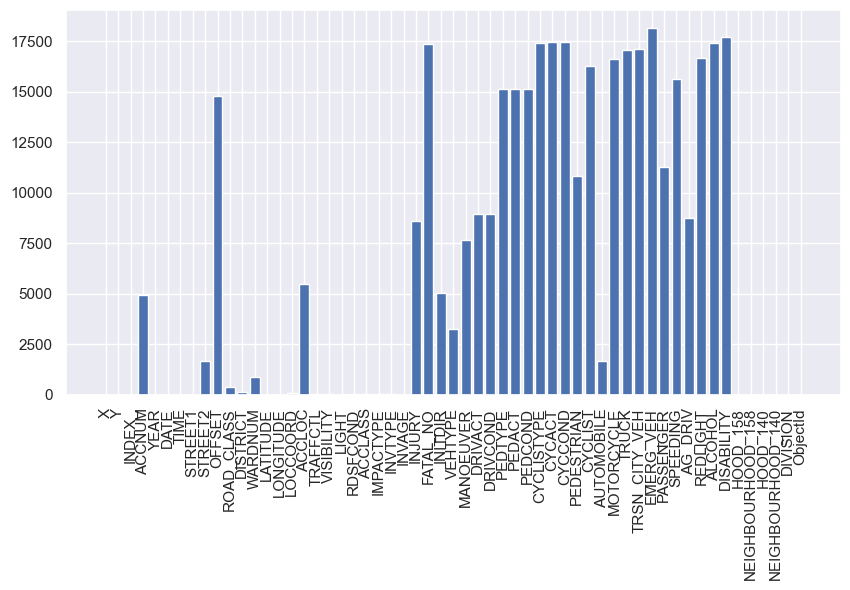

In [33]:
#plot missing values in the dataset using matplotlib, ratation of x-axis labels is set to 90 degrees
plt.figure(figsize=(10,5))
x = df.isnull().sum().index
y = df.isnull().sum().values
plt.bar(x,y)
plt.xticks(rotation=90)
plt.show()



In [5]:
df['DISTRICT'].value_counts(), df['DISTRICT'].isnull().sum()

(DISTRICT
 Toronto and East York    6125
 Etobicoke York           4207
 Scarborough              4116
 North York               3637
 Toronto East York           4
 Name: count, dtype: int64,
 105)

In [6]:
df['INVTYPE'].value_counts(), df['INVTYPE'].isnull().sum()

(INVTYPE
 Driver                  8276
 Pedestrian              3112
 Passenger               2767
 Vehicle Owner           1637
 Cyclist                  784
 Motorcycle Driver        697
 Truck Driver             346
 Other Property Owner     257
 Other                    186
 Motorcycle Passenger      39
 Moped Driver              30
 Driver - Not Hit          17
 Wheelchair                17
 In-Line Skater             5
 Cyclist Passenger          3
 Trailer Owner              2
 Pedestrian - Not Hit       1
 Witness                    1
 Moped Passenger            1
 Name: count, dtype: int64,
 16)

In [7]:
df['INJURY'].value_counts(), df['INJURY'].isnull().sum()

(INJURY
 Major      6151
 Minor      1422
 Minimal    1123
 Fatal       931
 Name: count, dtype: int64,
 8567)

In [8]:
df['FATAL_NO'].value_counts(), df['FATAL_NO'].isnull().sum()

(FATAL_NO
 11.0    19
 1.0     15
 35.0    15
 31.0    15
 5.0     15
         ..
 75.0     1
 76.0     1
 69.0     1
 70.0     1
 77.0     1
 Name: count, Length: 78, dtype: int64,
 17367)

In [9]:
df['INITDIR'].value_counts(), df['INITDIR'].isnull().sum()

(INITDIR
 East       3260
 West       3197
 South      3106
 North      3069
 Unknown     510
 Name: count, dtype: int64,
 5052)

(VEHTYPE
 Automobile, Station Wagon           7485
 Other                               4751
 Bicycle                              780
 Motorcycle                           699
 Municipal Transit Bus (TTC)          274
 Pick Up Truck                        238
 Truck - Open                         179
 Passenger Van                        132
 Delivery Van                          85
 Truck - Closed (Blazer, etc)          66
 Street Car                            48
 Truck - Dump                          42
 Truck-Tractor                         40
 Taxi                                  28
 Moped                                 24
 Truck (other)                         19
 Bus (Other) (Go Bus, Gray Coach)      17
 Intercity Bus                         14
 Truck - Tank                          11
 Tow Truck                              7
 Police Vehicle                         6
 School Bus                             6
 Construction Equipment                 4
 Fire Vehicle            

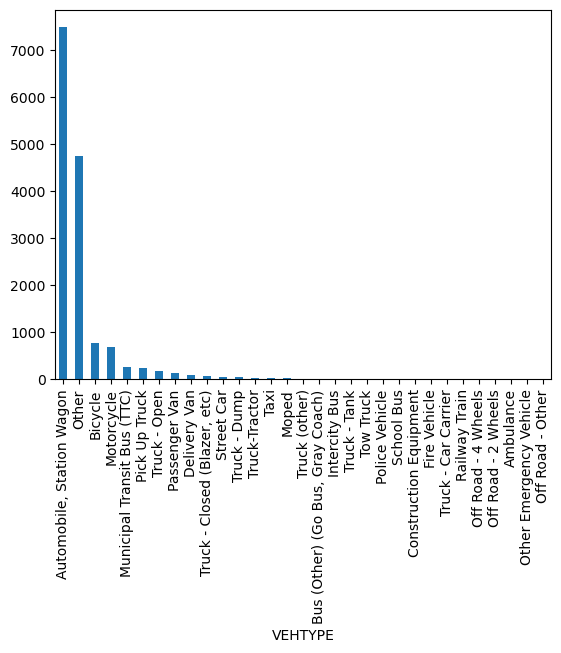

In [10]:
df['VEHTYPE'].value_counts(),df['VEHTYPE'].isnull().sum(), df['VEHTYPE'].value_counts().plot(kind='bar')

In [11]:
df['MANOEUVER'].value_counts(), df['MANOEUVER'].isnull().sum()

(MANOEUVER
 Going Ahead                            6269
 Turning Left                           1786
 Stopped                                 620
 Turning Right                           476
 Slowing or Stopping                     282
 Changing Lanes                          216
 Parked                                  183
 Other                                   181
 Reversing                               122
 Unknown                                 122
 Making U Turn                           106
 Overtaking                               91
 Pulling Away from Shoulder or Curb       40
 Pulling Onto Shoulder or towardCurb      18
 Merging                                  18
 Disabled                                  4
 Name: count, dtype: int64,
 7660)

In [12]:
df['DRIVACT'].value_counts()


DRIVACT
Driving Properly                4223
Failed to Yield Right of Way    1541
Lost control                     975
Improper Turn                    573
Other                            504
Disobeyed Traffic Control        475
Following too Close              251
Exceeding Speed Limit            246
Speed too Fast For Condition     208
Improper Lane Change             122
Improper Passing                 112
Wrong Way on One Way Road          9
Speed too Slow                     4
Name: count, dtype: int64

In [13]:
df['DRIVCOND'].value_counts(), df['DRIVCOND'].isnull().sum()

(DRIVCOND
 Normal                                5849
 Inattentive                           1581
 Unknown                               1100
 Medical or Physical Disability         177
 Had Been Drinking                      163
 Ability Impaired, Alcohol Over .08     126
 Ability Impaired, Alcohol              121
 Other                                   52
 Fatigue                                 51
 Ability Impaired, Drugs                 20
 Name: count, dtype: int64,
 8954)

In [14]:
df['PEDCOND'].value_counts(), df['PEDCOND'].isnull().sum()

(PEDCOND
 Normal                                1740
 Inattentive                            557
 Unknown                                366
 Had Been Drinking                      213
 Medical or Physical Disability          72
 Other                                   71
 Ability Impaired, Alcohol               41
 Ability Impaired, Alcohol Over .80      12
 Ability Impaired, Drugs                 10
 Fatigue                                  2
 Name: count, dtype: int64,
 15110)

In [15]:
df['PEDACT'].value_counts(), df['PEDACT'].isnull().sum()

(PEDACT
 Crossing with right of way               970
 Crossing, no Traffic Control             716
 Crossing without right of way            420
 On Sidewalk or Shoulder                  271
 Other                                    229
 Running onto Roadway                     225
 Crossing, Pedestrian Crossover            62
 Person Getting on/off Vehicle             39
 Coming From Behind Parked Vehicle         34
 Walking on Roadway with Traffic           32
 Walking on Roadway Against Traffic        24
 Playing or Working on Highway             24
 Crossing marked crosswalk without ROW     18
 Pushing/Working on Vehicle                16
 Person Getting on/off School Bus           2
 Name: count, dtype: int64,
 15112)

In [16]:
df['CYCCOND'].isnull().sum()

17429

In [17]:
df['CYCCOND'].value_counts()

CYCCOND
Normal                                528
Inattentive                           109
Unknown                                75
Had Been Drinking                      30
Other                                  11
Ability Impaired, Alcohol               4
Medical or Physical Disability          3
Ability Impaired, Drugs                 2
Fatigue                                 2
Ability Impaired, Alcohol Over .80      1
Name: count, dtype: int64

In [18]:
df.columns

Index(['X', 'Y', 'INDEX_', 'ACCNUM', 'YEAR', 'DATE', 'TIME', 'STREET1',
       'STREET2', 'OFFSET', 'ROAD_CLASS', 'DISTRICT', 'WARDNUM', 'LATITUDE',
       'LONGITUDE', 'LOCCOORD', 'ACCLOC', 'TRAFFCTL', 'VISIBILITY', 'LIGHT',
       'RDSFCOND', 'ACCLASS', 'IMPACTYPE', 'INVTYPE', 'INVAGE', 'INJURY',
       'FATAL_NO', 'INITDIR', 'VEHTYPE', 'MANOEUVER', 'DRIVACT', 'DRIVCOND',
       'PEDTYPE', 'PEDACT', 'PEDCOND', 'CYCLISTYPE', 'CYCACT', 'CYCCOND',
       'PEDESTRIAN', 'CYCLIST', 'AUTOMOBILE', 'MOTORCYCLE', 'TRUCK',
       'TRSN_CITY_VEH', 'EMERG_VEH', 'PASSENGER', 'SPEEDING', 'AG_DRIV',
       'REDLIGHT', 'ALCOHOL', 'DISABILITY', 'HOOD_158', 'NEIGHBOURHOOD_158',
       'HOOD_140', 'NEIGHBOURHOOD_140', 'DIVISION', 'ObjectId'],
      dtype='object')

In [19]:
df['EMERG_VEH'].value_counts()

EMERG_VEH
Yes    43
Name: count, dtype: int64

In [20]:
df['DISABILITY'].value_counts()

DISABILITY
Yes    486
Name: count, dtype: int64

In [21]:
df['DIVISION'].unique()

array(['D11', 'D42', 'D55', 'D41', 'D14', 'D22', 'D23', 'D52', 'D12',
       'D32', 'D33', 'D43', 'D53', 'D13', 'D51', 'D31', 'NSA'],
      dtype=object)

In [22]:
df['ACCLASS'].unique()

array(['Fatal', 'Non-Fatal Injury', 'Property Damage Only', nan],
      dtype=object)

In [23]:
df['ACCLASS'].value_counts()

ACCLASS
Non-Fatal Injury        15599
Fatal                    2573
Property Damage Only       17
Name: count, dtype: int64

In [24]:
df.describe()

,X,Y,INDEX_,ACCNUM,YEAR,TIME,WARDNUM,LATITUDE,LONGITUDE,FATAL_NO,ObjectId
count,1.819400e+04,1.819400e+04,1.819400e+04,1.326400e+04,18194.000000,18194.000000,1.733200e+04,18194.000000,18194.000000,827.000000,18194.000000
mean,-8.838345e+06,5.420748e+06,3.818870e+07,4.248444e+08,2012.934869,1362.615917,2.521028e+03,43.710459,-79.396201,29.073761,9097.500000
std,1.162533e+04,8.682160e+03,3.726463e+07,1.065503e+09,4.754258,630.816048,1.844803e+05,0.056369,0.104432,17.803627,5252.299734
min,-8.865305e+06,5.402162e+06,3.363207e+06,2.530100e+04,2006.000000,0.000000,1.000000e+00,43.589678,-79.638390,1.000000,1.000000
25%,-8.846591e+06,5.413242e+06,5.391370e+06,1.021229e+06,2009.000000,920.000000,7.000000e+00,43.661727,-79.470280,14.000000,4549.250000
50%,-8.838448e+06,5.419556e+06,7.644612e+06,1.197308e+06,2012.000000,1450.000000,1.300000e+01,43.702745,-79.397132,28.000000,9097.500000
75%,-8.829671e+06,5.427813e+06,8.078261e+07,1.365020e+06,2017.000000,1850.000000,2.200000e+01,43.756345,-79.318286,42.000000,13645.750000
max,-8.807929e+06,5.443099e+06,8.170606e+07,4.008024e+09,2022.000000,2359.000000,1.716222e+07,43.855445,-79.122974,78.000000,18194.000000


KeyError: 'MONTH'

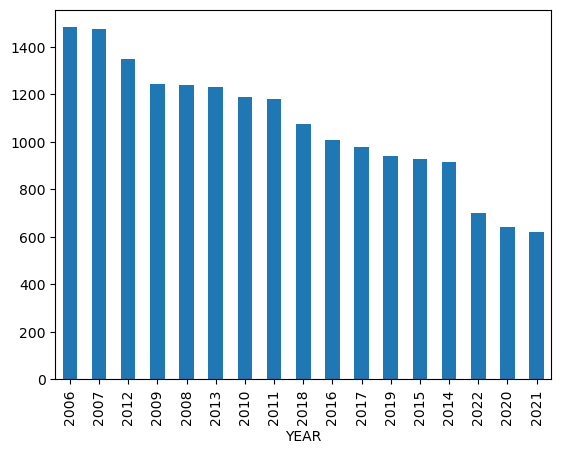

In [25]:
# plot count row group by year 
df['YEAR'].value_counts().plot(kind='bar')
# plot count row group by month
df['MONTH'].value_counts().plot(kind='bar')

